### Problem Formulation 

1.   Investigate which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) and do some EDA.
2.   Plot bar charts showing impacts of employee salaries on retention.
3.   Plot bar charts showing correlation between department and employee retention.
4.   Now build logistic regression model using variables that were narrowed down in step 1.
5.   Measure the accuracy of the model

### Question 1, 2, 3

#### Import modules and libraries 

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [156]:
# change scientific number to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#### Import data 

In [194]:
hr_data = pd.read_csv('HR_comma_sep.csv')
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

#### Data cleaning and preprocessing 

In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_data['left'].replace({0: 'Stay', 1:'Leave'}, inplace=True)

#### How many employees left the company? 

In [7]:
left = hr_data[hr_data['left'] == 'Leave']
print(len(left['left']))

3571


There are 3571 employees that left company.

11428


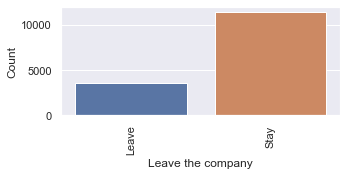

In [168]:
left = hr_data[hr_data['left'] == 'Stay']
print(len(left['left']))

fig = plt.figure(figsize=(5,2))
axes = sns.countplot(x=hr_data['left'])
axes.set(xlabel='Leave the company', ylabel='Count')
plt.xticks(rotation=90)
plt.show()

#### How is that related to other variables? 

##### How does satisfaction level affect the employee attrition?

As shown in the barchart below, it is clearly seen that employees that left the company has a low satisfaction level. It is also strengthened from the histogram, employees who got high satisfaction level-above the average-0.5 (given from their upper management) tend to stay in the company. 

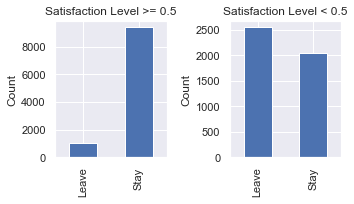

In [171]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['satisfaction_level']>=0.5, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Satisfaction Level >= 0.5")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['satisfaction_level']<0.5, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Satisfaction Level < 0.5")
plt.ylabel("Count")
plt.tight_layout()

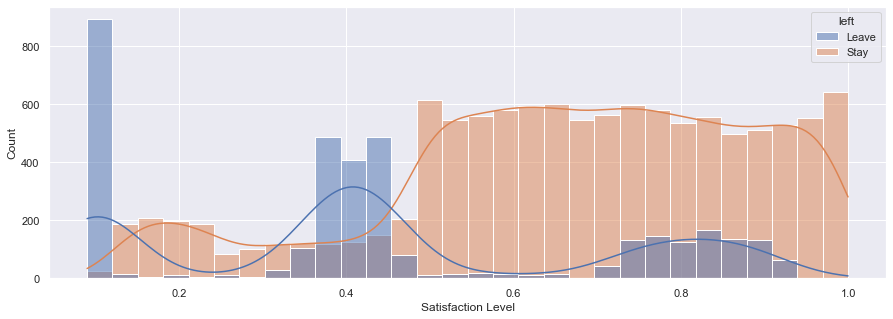

In [169]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data, x='satisfaction_level', hue='left', kde=True)
axes.set(xlabel='Satisfaction Level')
plt.show()

##### How does last evaluation affect the employee attrition?

From this barchart, we can shortly infer that most employees left the company with a last evaluation more than 0.72 (above median). In addition, employees with low last evaluation and high evaluation tend to leave, but the ones with average evaluation stay in the company (shown in the histogram). 

In [170]:
hr_data['last_evaluation'].median()

0.72

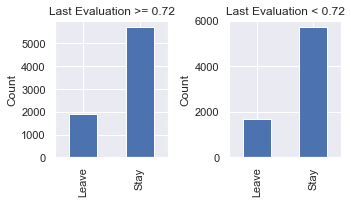

In [172]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['last_evaluation']>=0.72, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Last Evaluation >= 0.72")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['last_evaluation']<0.72, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Last Evaluation < 0.72")
plt.ylabel("Count")
plt.tight_layout()

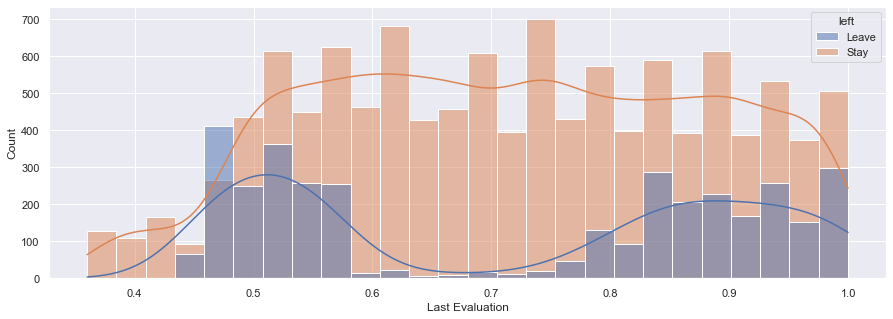

In [173]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data, x='last_evaluation', hue='left', kde=True)
axes.set(xlabel='Last Evaluation')
plt.show()

##### How does number of projects affect the employee attrition?

Employees with less number of project tend to leave the company. Some internal issues may be the cause of this. 

In [174]:
hr_data['number_project'].median()

4.0

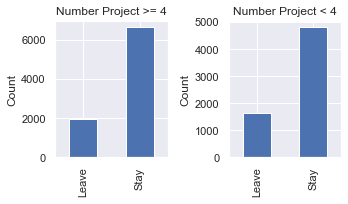

In [175]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['number_project']>=4, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Number Project >= 4")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['number_project']<4, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Number Project < 4")
plt.ylabel("Count")
plt.tight_layout()

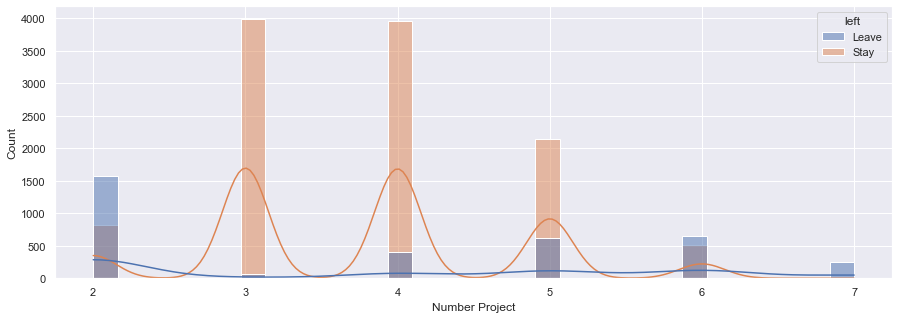

In [176]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data, x='number_project', hue='left', kde=True)
axes.set(xlabel='Number Project')
plt.show()

##### How does average monthly hours affect the employee attrition?

Employees with more than 201 avg monthly hours tend to leave the company. Some internal issues may be the cause of this. The histogram can cleary explain to us the tendency of employees to leave the company. 

In [177]:
hr_data['average_montly_hours'].mean()

201.0503366891126

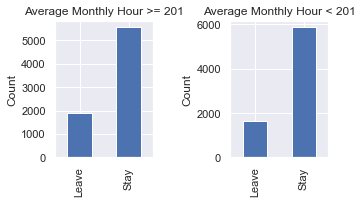

In [179]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['average_montly_hours']>=201, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Average Monthly Hour >= 201")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['average_montly_hours']<201, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Average Monthly Hour < 201")
plt.ylabel("Count")
plt.tight_layout()

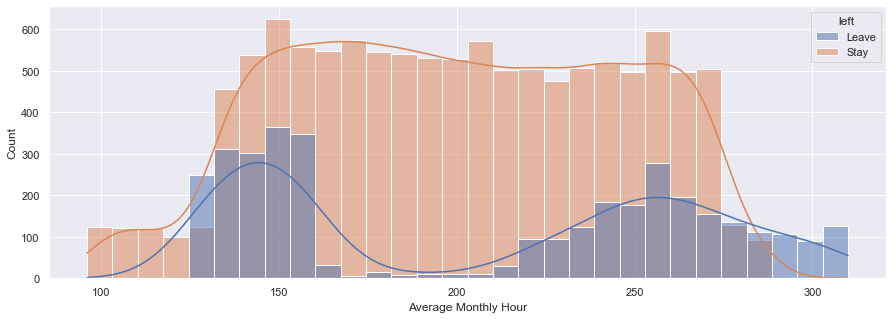

In [180]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data, x='average_montly_hours', hue='left', kde=True)
axes.set(xlabel='Average Monthly Hour')
plt.show()

##### How does time-spent in company affect the employee attrition?

Average time spent of employees in the company is approximately 3.5 years. It is clearly seen from the barchart, that employees that spend more than 3.5 years in this company tend to leave. Some internal issues may be the cause of this, or the employees want to explore a brand new experience in another company. 

In [181]:
hr_data['time_spend_company'].mean()

3.498233215547703

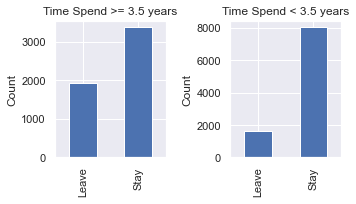

In [182]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['time_spend_company']>=3.5, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Time Spend >= 3.5 years")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['time_spend_company']<3.5, 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Time Spend < 3.5 years")
plt.ylabel("Count")
plt.tight_layout()

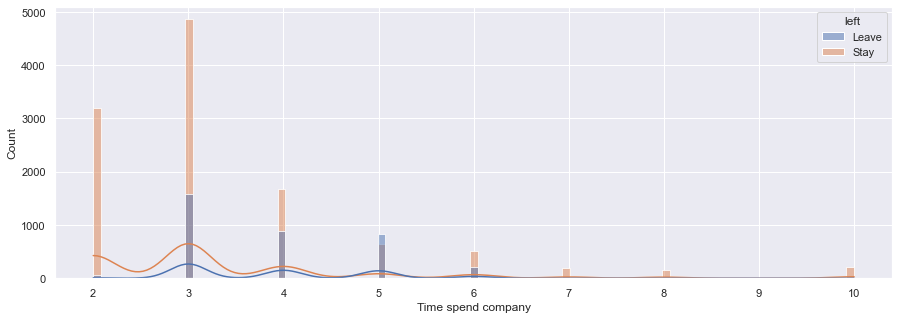

In [184]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data, x='time_spend_company', hue='left', kde=True)
axes.set(xlabel='Time spend company')
plt.show()

##### How does the work accident affect the employee attrition?

Employees with no accident tend to leave the company, but personally I think this has nothing to do with the employee attrition. From the two histogram plotted, it can be said that lots of employees have a good satisfaction level (above 0.3) and that employees have no accident during work.

In [185]:
hr_data['Work_accident'].replace({0: 'No Accident', 1:'With Accident'}, inplace=True)

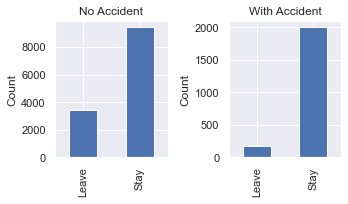

In [186]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['Work_accident']=='No Accident', 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("No Accident")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['Work_accident']=='With Accident', 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("With Accident")
plt.ylabel("Count")
plt.tight_layout()

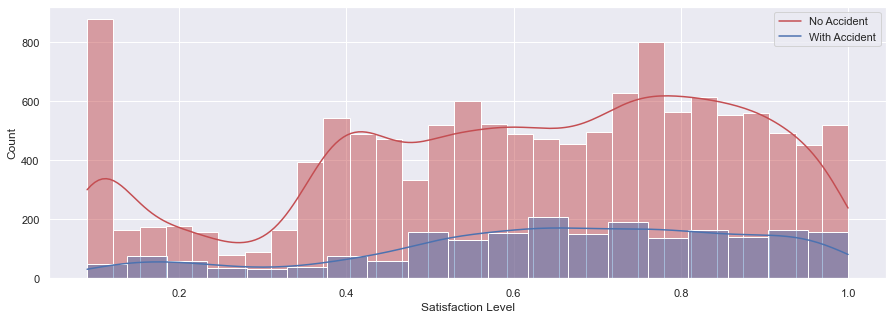

In [187]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data[hr_data['Work_accident']=='No Accident']['satisfaction_level'], kde=True, color='r')
axes = sns.histplot(data=hr_data[hr_data['Work_accident']=='With Accident']['satisfaction_level'], kde=True, color='b')
axes.set(xlabel='Satisfaction Level')
plt.legend(['No Accident', 'With Accident'])
plt.show()

##### How does the promotion affect the employee attrition?

Employees who have never been promoted in the last 5 years left the company.

In [188]:
hr_data['promotion_last_5years'].replace({0: 'Not Promoted', 1:'Promoted'}, inplace=True)

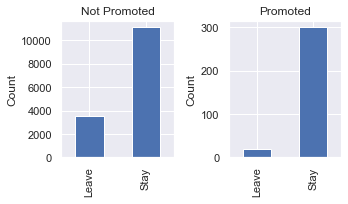

In [189]:
fig = plt.figure(figsize=(5,3))
plt.subplot(121)
hr_data.loc[hr_data['promotion_last_5years']=='Not Promoted', 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Not Promoted")
plt.ylabel("Count")

plt.subplot(122)
hr_data.loc[hr_data['promotion_last_5years']=='Promoted', 'left'].value_counts().sort_index().plot(kind='bar')
plt.title("Promoted")
plt.ylabel("Count")
plt.tight_layout()

##### How does the salary the employee attrition?

From this barchart, we can say that most employees left the company with a low salary and from Sales department then continued from Technical department and Support. Employees with low salary that left the company are mostly from Sales department, and so is the medium range one. 

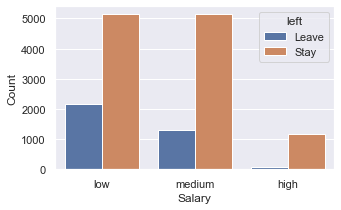

In [190]:
fig = plt.figure(figsize=(5,3))
axes = sns.countplot(x=hr_data['salary'], hue=hr_data['left'])
axes.set(xlabel='Salary', ylabel='Count')
plt.show()

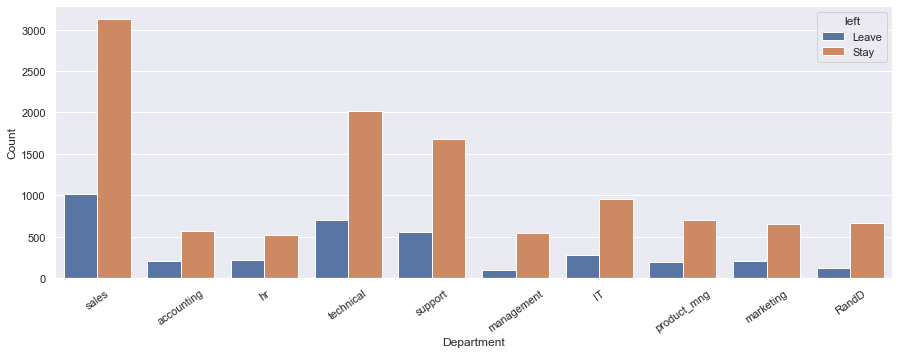

In [193]:
fig = plt.figure(figsize=(15,5))
axes = sns.countplot(x=hr_data['Department'], hue=hr_data['left'])
axes.set(xlabel='Department', ylabel='Count')
plt.xticks(rotation=35)
plt.show()

<Figure size 1440x360 with 0 Axes>

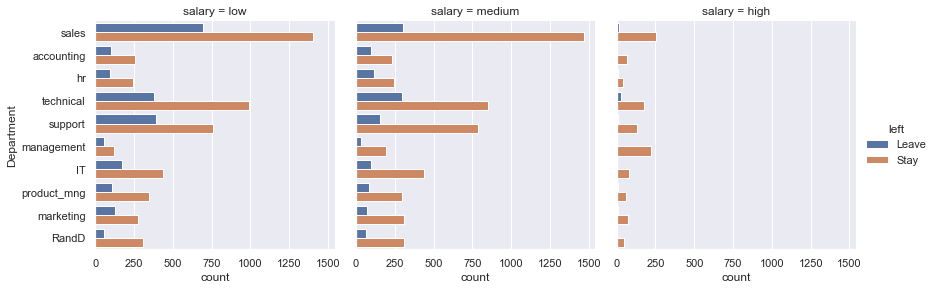

In [146]:
fig = plt.figure(figsize=(20,5))
axes = sns.catplot(y = "Department", col="salary", hue = "left", data=hr_data, kind="count", height=4)

##### How does the salary affect the satisfaction level?

Lots of employees with low, medium, and high salary have a good satisfaction level.

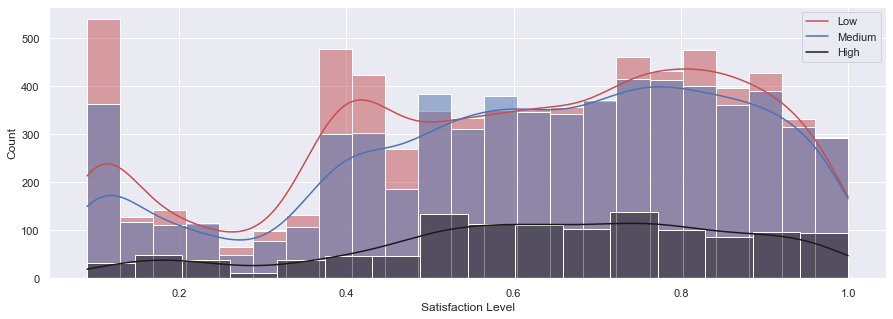

In [192]:
fig = plt.figure(figsize=(15,5))
axes = sns.histplot(data=hr_data[hr_data['salary']=='low']['satisfaction_level'], kde=True, color='r')
axes = sns.histplot(data=hr_data[hr_data['salary']=='medium']['satisfaction_level'], kde=True, color='b')
axes = sns.histplot(data=hr_data[hr_data['salary']=='high']['satisfaction_level'], kde=True, color='k')
axes.set(xlabel='Satisfaction Level')
plt.legend(['Low', 'Medium', 'High'])
plt.show()

To conclude and answer Question 1, not all features have strong correlation to employee attrition, for example Work Accident. The features that strongly relate to this are Salary, Satisfaction Level, Last Evaluation, Average Monthly Hour, Time spent in company, Promotion in last 5 years. 

To make this clear, let's have a look at the pairplot to see each feature's correlation to another. 

In [196]:
hr_new = hr_data[['satisfaction_level', 'last_evaluation', 
                  'number_project', 'average_montly_hours', 'time_spend_company']]

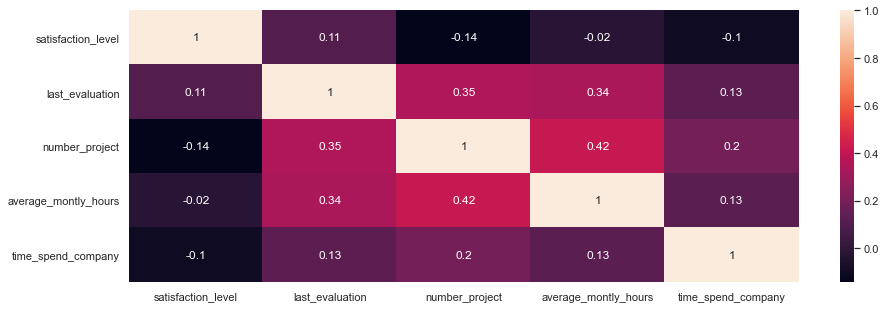

In [197]:
fig = plt.figure(figsize=(15,5))
axes = sns.heatmap(hr_new.corr(), annot=True)

### Question 4: Building Logistic Regression Model

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, explained_variance_score, accuracy_score, log_loss

In [205]:
hr_data['salary'].replace({'low': 0, 'medium':1, 'high':2}, inplace=True)

In [206]:
X = hr_data[['satisfaction_level', 'average_montly_hours', 'number_project', 'last_evaluation', 'salary']]
y = hr_data['left']

In [207]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [214]:
# fit the trainin data
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [228]:
# print coefficients
print(log_reg.coef_)
print(log_reg.intercept_)


[[-4.119452 0.004544 -0.256083 0.713254 -0.665233]]
[1.022597]


In [219]:
# make predictions from the test data
y_pred = log_reg.predict(x_test)
# print(len(y_pred))
print(y_pred[:5])
print(x_test[:5])

[0 0 1 0 1]
      satisfaction_level  average_montly_hours  number_project  \
6493                0.77                   162               5   
3568                0.96                   210               4   
972                 0.11                   290               6   
3260                0.58                   220               3   
671                 0.11                   264               6   

      last_evaluation  salary  
6493             0.57       2  
3568             0.71       1  
972              0.74       1  
3260             0.76       1  
671              0.94       0  


In [220]:
# the probability of leaving the company
log_reg.predict_proba(x_test[:5])

array([[0.973854, 0.026146],
       [0.959338, 0.040662],
       [0.446866, 0.553134],
       [0.778747, 0.221253],
       [0.288419, 0.711581]])

### Measuring the accuracy

In [229]:
print(str(round(log_reg.score(x_test,y_test)*100, 2)))

79.17


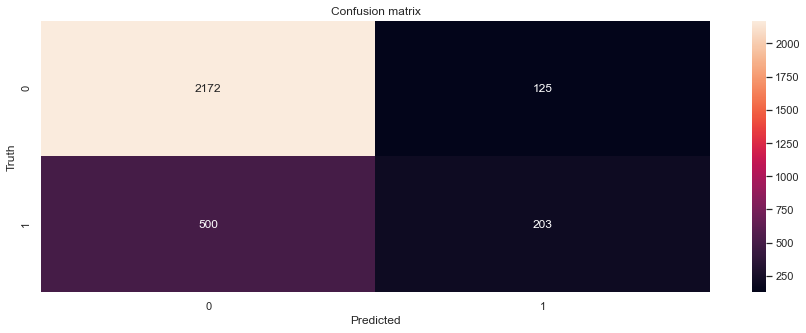

In [232]:
conf = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf, annot = True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()